<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/miky_generalYelpUsersSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

#res_agg = res.groupby(['restaurant','ethnicity']).count()[['user_id']]    #agg({'user_id':count})
#res_agg = res[res['restaurant'] == 'TupeloHoney'].groupby('ethnicity').count() 

In [7]:
# Prendo i dati che mi servono di tutti i ristoranti

# Percentuali di opinione di una etnia in generale su yelp, in base al numero effettivo di utenti della stessa etnia

asian = res['ethnicity'] == 'asian'
mexican = res['ethnicity'] == 'hispanic, latino, or spanish origin'
black_american = res['ethnicity'] == 'black or african american'
white_american = res['ethnicity'] == 'white'
positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'

# ALL RESTAURANTS

totAmericanUsers = len(res[(black_american) | (white_american)])
totAsianUsers = len(res[(asian)])
totMexicanUsers = len(res[(mexican)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_positive = ((len(res[((black_american) & (positive)) | ((white_american) & (positive))])) * 100) / totAmericanUsers
asian_positive = (len(res[(asian) & (positive)]) * 100) / totAsianUsers
mexican_positive = (len(res[(mexican) & (positive)]) * 100) / totMexicanUsers

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_negative = ((len(res[((black_american) & (negative)) | ((white_american) & (negative))])) * 100) / totAmericanUsers
asian_negative = (len(res[(asian) & (negative)]) * 100) / totAsianUsers
mexican_negative = (len(res[(mexican) & (negative)]) * 100) / totMexicanUsers

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
american_neutral = ((len(res[((black_american) & (neutral)) | ((white_american) & (neutral))])) * 100) / totAmericanUsers
asian_neutral = (len(res[(asian) & (neutral)]) * 100) / totAsianUsers
mexican_neutral = (len(res[(mexican) & (neutral)]) * 100) / totMexicanUsers



100.0
100.0
100.0


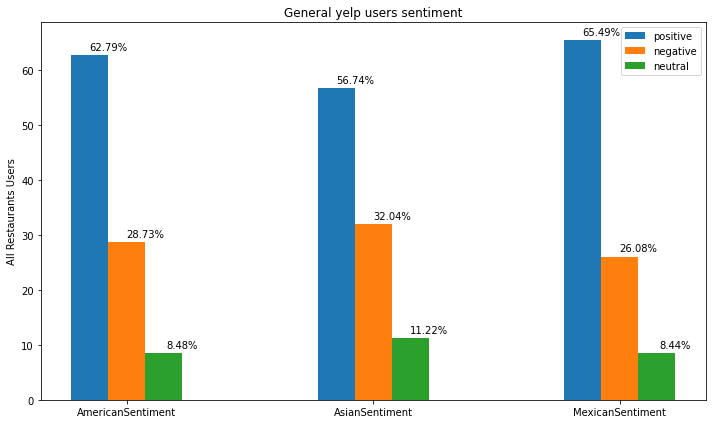

In [17]:
# Costruisco il grafico

labels = ['AmericanSentiment', 'AsianSentiment', 'MexicanSentiment']

# GRAFICO PER TUTTI GLI UTENTI

# valori barre
positive = [american_positive, asian_positive, mexican_positive]
negative = [american_negative, asian_negative, mexican_negative]
neutral = [american_neutral, asian_neutral, mexican_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative')
rects3 = ax.bar(x + width, neutral, width, label='neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()